In [1]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
# ================= CONSTANTS =================
PMT_PULSE_LENGTH = 1500  # Sample lenght of a typical pulse

# Loading dataset

In [3]:
#No normalization is required
#Loading isolated pulses (not long traces)
df = pd.read_csv("../PeakDetection_test_Cs137.csv", index_col = 0)

In [4]:
df

0  1  2  3  4  5  6  7  8  9  ...  1491  1492  1493  1494  1495  1496  \
20      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
30      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     6    14   
49      0  0  0  0  0  0  0  0  0  0  ...     0     0    -1     0     0     0   
63      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     1     0     0   
64      0  0  0  0  0  0  0  0  0  0  ...    -1     0     0     0     0     0   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
302597  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302601  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302606  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302609  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302615  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        1497  1498  1499                                      peakLocations  
20         0     0     0  [5, 20, 35, 39, 44, 53, 57, 63, 68, 72, 78, 82...  
30        15     8     9  [4, 16, 29, 38, 190, 237, 478, 508, 543, 938, ...  
49         0     0     0                        [4, 58, 116, 159, 194, 210]  
63         0     0     0  [6, 19, 29, 34, 39, 48, 53, 61, 72, 76, 82, 86...  
64         0     0     0  [7, 18, 26, 34, 44, 51, 58, 62, 69, 75, 82, 88...  
...      ...   ...   ...                                                ...  
302597     0     0     0  [5, 14, 24, 33, 39, 45, 54, 58, 63, 76, 89, 97...  
302601     0     0     0  [4, 18, 22, 37, 56, 78, 82, 85, 89, 102, 107, ...  
302606     7     9     7  [4, 19, 26, 106, 127, 154, 207, 276, 342, 431,...  
302609     0     0     0  [5, 18, 21, 25, 35, 44, 55, 62, 68, 74, 78, 88...  
302615     0     0     0  [5, 20, 24, 35, 55, 62, 71, 75, 84, 96, 108, 1...  

[42986 rows x 1501 columns]

# Peak detection and valid pulse filtering algorithms

In [5]:
def pkdetect(x, thr=100, pkh=10):
    peak=[]
    lmax=0
    imax=0
    count=0
    for i in range(1,len(x)):
        if x[i] <= thr:
            pass
        elif x[i] > lmax:
            imax=i
            lmax=x[i]
        elif ((lmax-x[i-1]) > pkh) and (x[i]-x[i-1])>0:
            peak.append(imax)
            lmax=0
        else:
            pass
            
    return peak

# Filtering only valid typical pulses

### Remove baseline frist

### Apply pulse validation algorithm

In [6]:
dfPulses = df.copy()
dfPulses

0  1  2  3  4  5  6  7  8  9  ...  1491  1492  1493  1494  1495  1496  \
20      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
30      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     6    14   
49      0  0  0  0  0  0  0  0  0  0  ...     0     0    -1     0     0     0   
63      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     1     0     0   
64      0  0  0  0  0  0  0  0  0  0  ...    -1     0     0     0     0     0   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
302597  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302601  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302606  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302609  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302615  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        1497  1498  1499                                      peakLocations  
20         0     0     0  [5, 20, 35, 39, 44, 53, 57, 63, 68, 72, 78, 82...  
30        15     8     9  [4, 16, 29, 38, 190, 237, 478, 508, 543, 938, ...  
49         0     0     0                        [4, 58, 116, 159, 194, 210]  
63         0     0     0  [6, 19, 29, 34, 39, 48, 53, 61, 72, 76, 82, 86...  
64         0     0     0  [7, 18, 26, 34, 44, 51, 58, 62, 69, 75, 82, 88...  
...      ...   ...   ...                                                ...  
302597     0     0     0  [5, 14, 24, 33, 39, 45, 54, 58, 63, 76, 89, 97...  
302601     0     0     0  [4, 18, 22, 37, 56, 78, 82, 85, 89, 102, 107, ...  
302606     7     9     7  [4, 19, 26, 106, 127, 154, 207, 276, 342, 431,...  
302609     0     0     0  [5, 18, 21, 25, 35, 44, 55, 62, 68, 74, 78, 88...  
302615     0     0     0  [5, 20, 24, 35, 55, 62, 71, 75, 84, 96, 108, 1...  

[42986 rows x 1501 columns]

# ===== DEBUGGING TEST - DO NOT RUN =======

In [34]:
samplePulse = dfPulses.iloc[20]
samplePulse

0                                                                   6
1                                                                  12
2                                                                  14
3                                                                  11
4                                                                  10
                                          ...                        
1498                                                                2
1499                                                                2
peakLocations       [6, 13, 22, 28, 40, 54, 86, 108, 136, 158, 174...
arrivalTimes        [7, 16, 22, 34, 48, 80, 102, 130, 152, 168, 17...
timeBetweenPeaks    [7, 9, 6, 12, 14, 32, 22, 28, 22, 16, 9, 11, 1...
Name: 177, Length: 1503, dtype: object

<IPython.core.display.Javascript object>


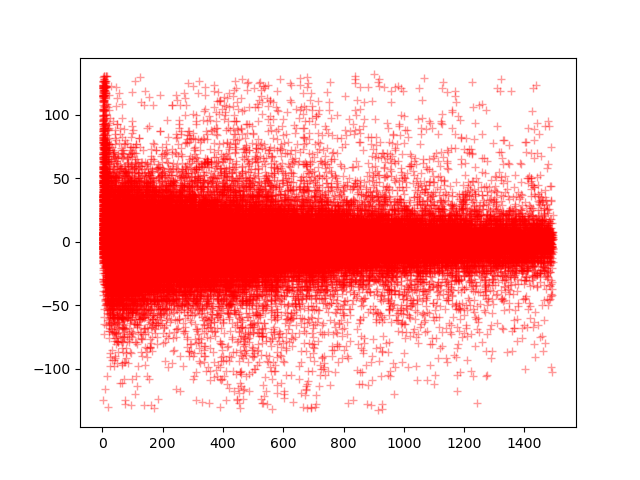

In [64]:
%matplotlib notebook
x = samplePulse.loc["peakLocations"]
y = samplePulse[x]

BASELINE_SHIFT = 2

for i in range(1000):
    samplePulse = dfPulses.iloc[i]
    x = samplePulse.loc["peakLocations"]
    y = []
    
    
    for j in range(len(x)):
        y.append(samplePulse[x[j]] - samplePulse[x[j - BASELINE_SHIFT]])
    
    plt.plot(x,y, 'r+', alpha = 0.4)

plt.show()

In [28]:
dfPulses

0   1   2   3   4   5   6   7   8   9  ...  1493  1494  1495  1496  \
7       41  30  30  25  15  22  41  63  91  91  ...     2     2     2     2   
10       1   2  44  34  30  37  53  70  71  88  ...     2     2     4     6   
11       6   3   2   4   1   3   2   3   2   3  ...     2     1     2     1   
12      11   6   2   5   2   2  11  18  14  11  ...     3     1     3     1   
40       2   2   2   3   1   4  14  20  14  12  ...     3     2     3     1   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   ...   ...   ...   ...   
156991  26  19  14   9   7   8  18  31  29  21  ...     2     1     3     2   
156993  10   6   6   4   3   3   3  10  19  19  ...     1     2     1     2   
157015  58  36  31  18  11  12  21  26  33  39  ...     2     3     2     2   
157019   7   6   3   3   2   4   2   3   9  16  ...     3     2     2     2   
157021   3   2   1   3   1   3   3  15  27  28  ...     2     2     3     1   

        1497  1498  1499                                      peakLocations  \
7          2     3     2  [1, 8, 23, 26, 31, 39, 66, 69, 94, 117, 122, 1...   
10         9    22    37  [2, 11, 22, 32, 41, 51, 55, 73, 76, 80, 93, 10...   
11         2     2     2  [19, 50, 72, 114, 143, 173, 184, 239, 266, 350...   
12         2     1     2                                      [7, 195, 273]   
40         3     1     3  [7, 37, 161, 221, 267, 361, 373, 399, 408, 443...   
...      ...   ...   ...                                                ...   
156991     2     2     2  [1, 7, 13, 26, 31, 40, 49, 54, 57, 68, 74, 83,...   
156993     1     2     1  [13, 18, 22, 31, 42, 64, 99, 121, 139, 164, 17...   
157015     1     1     1  [1, 13, 21, 31, 39, 45, 57, 61, 71, 80, 91, 11...   
157019     3     1     2  [13, 65, 138, 154, 169, 185, 212, 253, 335, 36...   
157021     2     2     2  [9, 22, 29, 35, 195, 360, 370, 392, 403, 556, ...   

                                             arrivalTimes  \
7       [7, 22, 25, 30, 38, 65, 68, 93, 116, 121, 129,...   
10      [9, 20, 30, 39, 49, 53, 71, 74, 78, 91, 98, 11...   
11      [31, 53, 95, 124, 154, 165, 220, 247, 331, 367...   
12                                             [188, 266]   
40      [30, 154, 214, 260, 354, 366, 392, 401, 436, 4...   
...                                                   ...   
156991  [6, 12, 25, 30, 39, 48, 53, 56, 67, 73, 82, 98...   
156993  [5, 9, 18, 29, 51, 86, 108, 126, 151, 160, 196...   
157015  [12, 20, 30, 38, 44, 56, 60, 70, 79, 90, 111, ...   
157019  [52, 125, 141, 156, 172, 199, 240, 322, 350, 3...   
157021  [13, 20, 26, 186, 351, 361, 383, 394, 547, 640...   

                                         timeBetweenPeaks  
7       [7, 15, 3, 5, 8, 27, 3, 25, 23, 5, 8, 7, 17, 6...  
10      [9, 11, 10, 9, 10, 4, 18, 3, 4, 13, 7, 15, 8, ...  
11      [31, 22, 42, 29, 30, 11, 55, 27, 84, 36, 18, 5...  
12                                              [188, 78]  
40      [30, 124, 60, 46, 94, 12, 26, 9, 35, 28, 154, ...  
...                                                   ...  
156991  [6, 6, 13, 5, 9, 9, 5, 3, 11, 6, 9, 16, 5, 9, ...  
156993  [5, 4, 9, 11, 22, 35, 22, 18, 25, 9, 36, 46, 8...  
157015  [12, 8, 10, 8, 6, 12, 4, 10, 9, 11, 21, 8, 16,...  
157019  [52, 73, 16, 15, 16, 27, 41, 82, 28, 15, 17, 2...  
157021  [13, 7, 6, 160, 165, 10, 22, 11, 153, 93, 7, 1...  

[23979 rows x 1503 columns]

In [26]:
%matplotlib notebook
dfPulses.iloc[1000:1010,:].T.plot()
plt.show()

TypeError: no numeric data to plot

In [213]:
import random
randPulse = random.randrange(len(df))
randPulse

1189

<IPython.core.display.Javascript object>


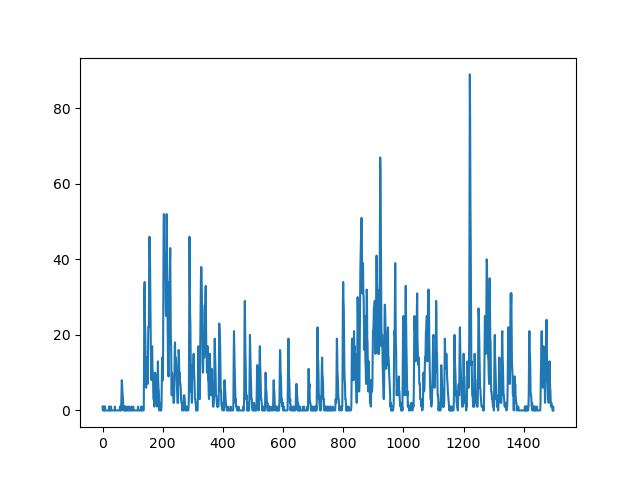

In [214]:
%matplotlib notebook
sample = df.iloc[randPulse,:PMT_PULSE_LENGTH]
sample.plot()
plt.show()
# print("Valid: "+ str(validPulse(sample, 5, 10, 200, 1.25)))

# ===== DEBUGGING ENDS HERE :) =======

# Peaks sequence detection

### Time between first and Nth peaks

In [7]:
def relativeArrivalTimes(x):
    deltaList = []
    for i in range(len(x) - 1):
        deltaList.append(x[i + 1] - x[0]) #Relative time respect to first peak
    
    return deltaList

### Time between successive peaks

In [8]:
def peaksStrToList(currentStrList):
    if type(currentStrList) == str:
        return np.array(currentStrList.replace("[", "").replace("]", "").replace("\n", "").split(",")).astype(int).tolist()
    return currentStrList

In [9]:
def timeBetweenPeaks(x):
    deltaList = []
    for i in range(len(x) - 1):
        deltaList.append(x[i + 1] - x[i]) #Relative time respect to first peak
    
    return deltaList

In [10]:
#Cleaning str-like characters from imported CSV data
dfPulses["peakLocations"] = dfPulses.iloc[:,-1].apply(peaksStrToList)
dfPulses

0  1  2  3  4  5  6  7  8  9  ...  1491  1492  1493  1494  1495  1496  \
20      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
30      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     6    14   
49      0  0  0  0  0  0  0  0  0  0  ...     0     0    -1     0     0     0   
63      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     1     0     0   
64      0  0  0  0  0  0  0  0  0  0  ...    -1     0     0     0     0     0   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
302597  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302601  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302606  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302609  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302615  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        1497  1498  1499                                      peakLocations  
20         0     0     0  [5, 20, 35, 39, 44, 53, 57, 63, 68, 72, 78, 82...  
30        15     8     9  [4, 16, 29, 38, 190, 237, 478, 508, 543, 938, ...  
49         0     0     0                        [4, 58, 116, 159, 194, 210]  
63         0     0     0  [6, 19, 29, 34, 39, 48, 53, 61, 72, 76, 82, 86...  
64         0     0     0  [7, 18, 26, 34, 44, 51, 58, 62, 69, 75, 82, 88...  
...      ...   ...   ...                                                ...  
302597     0     0     0  [5, 14, 24, 33, 39, 45, 54, 58, 63, 76, 89, 97...  
302601     0     0     0  [4, 18, 22, 37, 56, 78, 82, 85, 89, 102, 107, ...  
302606     7     9     7  [4, 19, 26, 106, 127, 154, 207, 276, 342, 431,...  
302609     0     0     0  [5, 18, 21, 25, 35, 44, 55, 62, 68, 74, 78, 88...  
302615     0     0     0  [5, 20, 24, 35, 55, 62, 71, 75, 84, 96, 108, 1...  

[42986 rows x 1501 columns]

In [11]:
dfPulses["arrivalTimes"] = dfPulses["peakLocations"].apply(relativeArrivalTimes)
dfPulses

0  1  2  3  4  5  6  7  8  9  ...  1492  1493  1494  1495  1496  1497  \
20      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
30      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     6    14    15   
49      0  0  0  0  0  0  0  0  0  0  ...     0    -1     0     0     0     0   
63      0  0  0  0  0  0  0  0  0  0  ...     0     0     1     0     0     0   
64      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
302597  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302601  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302606  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     7   
302609  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302615  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        1498  1499                                      peakLocations  \
20         0     0  [5, 20, 35, 39, 44, 53, 57, 63, 68, 72, 78, 82...   
30         8     9  [4, 16, 29, 38, 190, 237, 478, 508, 543, 938, ...   
49         0     0                        [4, 58, 116, 159, 194, 210]   
63         0     0  [6, 19, 29, 34, 39, 48, 53, 61, 72, 76, 82, 86...   
64         0     0  [7, 18, 26, 34, 44, 51, 58, 62, 69, 75, 82, 88...   
...      ...   ...                                                ...   
302597     0     0  [5, 14, 24, 33, 39, 45, 54, 58, 63, 76, 89, 97...   
302601     0     0  [4, 18, 22, 37, 56, 78, 82, 85, 89, 102, 107, ...   
302606     9     7  [4, 19, 26, 106, 127, 154, 207, 276, 342, 431,...   
302609     0     0  [5, 18, 21, 25, 35, 44, 55, 62, 68, 74, 78, 88...   
302615     0     0  [5, 20, 24, 35, 55, 62, 71, 75, 84, 96, 108, 1...   

                                             arrivalTimes  
20      [15, 30, 34, 39, 48, 52, 58, 63, 67, 73, 77, 8...  
30      [12, 25, 34, 186, 233, 474, 504, 539, 934, 100...  
49                               [54, 112, 155, 190, 206]  
63      [13, 23, 28, 33, 42, 47, 55, 66, 70, 76, 80, 9...  
64      [11, 19, 27, 37, 44, 51, 55, 62, 68, 75, 81, 8...  
...                                                   ...  
302597  [9, 19, 28, 34, 40, 49, 53, 58, 71, 84, 92, 96...  
302601  [14, 18, 33, 52, 74, 78, 81, 85, 98, 103, 112,...  
302606  [15, 22, 102, 123, 150, 203, 272, 338, 427, 51...  
302609  [13, 16, 20, 30, 39, 50, 57, 63, 69, 73, 83, 9...  
302615  [15, 19, 30, 50, 57, 66, 70, 79, 91, 103, 115,...  

[42986 rows x 1502 columns]

In [12]:
dfPulses["timeBetweenPeaks"] = dfPulses["peakLocations"].apply(timeBetweenPeaks)
dfPulses

0  1  2  3  4  5  6  7  8  9  ...  1493  1494  1495  1496  1497  1498  \
20      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
30      0  0  0  0  0  0  0  0  0  0  ...     0     0     6    14    15     8   
49      0  0  0  0  0  0  0  0  0  0  ...    -1     0     0     0     0     0   
63      0  0  0  0  0  0  0  0  0  0  ...     0     1     0     0     0     0   
64      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
302597  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302601  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302606  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     7     9   
302609  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302615  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        1499                                      peakLocations  \
20         0  [5, 20, 35, 39, 44, 53, 57, 63, 68, 72, 78, 82...   
30         9  [4, 16, 29, 38, 190, 237, 478, 508, 543, 938, ...   
49         0                        [4, 58, 116, 159, 194, 210]   
63         0  [6, 19, 29, 34, 39, 48, 53, 61, 72, 76, 82, 86...   
64         0  [7, 18, 26, 34, 44, 51, 58, 62, 69, 75, 82, 88...   
...      ...                                                ...   
302597     0  [5, 14, 24, 33, 39, 45, 54, 58, 63, 76, 89, 97...   
302601     0  [4, 18, 22, 37, 56, 78, 82, 85, 89, 102, 107, ...   
302606     7  [4, 19, 26, 106, 127, 154, 207, 276, 342, 431,...   
302609     0  [5, 18, 21, 25, 35, 44, 55, 62, 68, 74, 78, 88...   
302615     0  [5, 20, 24, 35, 55, 62, 71, 75, 84, 96, 108, 1...   

                                             arrivalTimes  \
20      [15, 30, 34, 39, 48, 52, 58, 63, 67, 73, 77, 8...   
30      [12, 25, 34, 186, 233, 474, 504, 539, 934, 100...   
49                               [54, 112, 155, 190, 206]   
63      [13, 23, 28, 33, 42, 47, 55, 66, 70, 76, 80, 9...   
64      [11, 19, 27, 37, 44, 51, 55, 62, 68, 75, 81, 8...   
...                                                   ...   
302597  [9, 19, 28, 34, 40, 49, 53, 58, 71, 84, 92, 96...   
302601  [14, 18, 33, 52, 74, 78, 81, 85, 98, 103, 112,...   
302606  [15, 22, 102, 123, 150, 203, 272, 338, 427, 51...   
302609  [13, 16, 20, 30, 39, 50, 57, 63, 69, 73, 83, 9...   
302615  [15, 19, 30, 50, 57, 66, 70, 79, 91, 103, 115,...   

                                         timeBetweenPeaks  
20      [15, 15, 4, 5, 9, 4, 6, 5, 4, 6, 4, 8, 7, 8, 4...  
30        [12, 13, 9, 152, 47, 241, 30, 35, 395, 67, 179]  
49                                   [54, 58, 43, 35, 16]  
63      [13, 10, 5, 5, 9, 5, 8, 11, 4, 6, 4, 11, 4, 12...  
64      [11, 8, 8, 10, 7, 7, 4, 7, 6, 7, 6, 6, 4, 6, 3...  
...                                                   ...  
302597  [9, 10, 9, 6, 6, 9, 4, 5, 13, 13, 8, 4, 3, 7, ...  
302601  [14, 4, 15, 19, 22, 4, 3, 4, 13, 5, 9, 5, 8, 4...  
302606  [15, 7, 80, 21, 27, 53, 69, 66, 89, 86, 435, 2...  
302609  [13, 3, 4, 10, 9, 11, 7, 6, 6, 4, 10, 9, 4, 3,...  
302615  [15, 4, 11, 20, 7, 9, 4, 9, 12, 12, 12, 9, 4, ...  

[42986 rows x 1503 columns]

# Filtering by energies

In [26]:
dfAreas = pd.read_csv("../PeakDetection_test_Cs137_Areas.csv", index_col = 0)
dfAreas

Cs137
20      13896
30        810
49        303
63      14947
64      15860
...       ...
302597  17820
302601  17176
302606    907
302609  16780
302615   5646

[42986 rows x 1 columns]

In [27]:
dfPulses = pd.concat([dfPulses, dfAreas], axis = 1)

In [28]:
upperEnergy = 22e3
lowerEnergy = 16e3
dfPulsesFiltered = dfPulses.loc[((dfPulses["Cs137"] > lowerEnergy) & (dfPulses["Cs137"] < upperEnergy))]
dfPulsesFiltered

0  1  2  3  4  5  6  7  8  9  ...  1494  1495  1496  1497  1498  1499  \
75      0  0  0  0  0  0  0  0  0 -1  ...     0     0     0     0     0     0   
111     0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
125     0  0  0  0  0  0  0  0  0  0  ...     1     0     0     0     0     0   
153     0  0  0  0  0  0  0 -1  0  0  ...     7     9     8     5     4     3   
178     0  0 -1  0  0  0  0 -1  0 -1  ...     0     0     0    -1     0     0   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
302436  0  0  0  0  0  0  0  0  0  0  ...     4     3     2     1     0     1   
302550  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302597  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302601  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302609  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

                                            peakLocations  \
75      [7, 17, 26, 37, 47, 55, 63, 74, 77, 86, 90, 95...   
111     [5, 8, 14, 23, 26, 31, 37, 41, 46, 55, 59, 73,...   
125     [5, 14, 20, 32, 36, 41, 48, 58, 64, 78, 83, 93...   
153     [6, 15, 27, 30, 34, 39, 44, 50, 54, 59, 65, 72...   
178     [5, 12, 23, 30, 39, 49, 55, 60, 67, 71, 75, 86...   
...                                                   ...   
302436  [5, 14, 21, 34, 48, 59, 62, 66, 78, 81, 87, 94...   
302550  [4, 183, 186, 190, 199, 207, 221, 232, 241, 25...   
302597  [5, 14, 24, 33, 39, 45, 54, 58, 63, 76, 89, 97...   
302601  [4, 18, 22, 37, 56, 78, 82, 85, 89, 102, 107, ...   
302609  [5, 18, 21, 25, 35, 44, 55, 62, 68, 74, 78, 88...   

                                             arrivalTimes  \
75      [10, 19, 30, 40, 48, 56, 67, 70, 79, 83, 88, 9...   
111     [3, 9, 18, 21, 26, 32, 36, 41, 50, 54, 68, 75,...   
125     [9, 15, 27, 31, 36, 43, 53, 59, 73, 78, 88, 99...   
153     [9, 21, 24, 28, 33, 38, 44, 48, 53, 59, 66, 74...   
178     [7, 18, 25, 34, 44, 50, 55, 62, 66, 70, 81, 85...   
...                                                   ...   
302436  [9, 16, 29, 43, 54, 57, 61, 73, 76, 82, 89, 95...   
302550  [179, 182, 186, 195, 203, 217, 228, 237, 246, ...   
302597  [9, 19, 28, 34, 40, 49, 53, 58, 71, 84, 92, 96...   
302601  [14, 18, 33, 52, 74, 78, 81, 85, 98, 103, 112,...   
302609  [13, 16, 20, 30, 39, 50, 57, 63, 69, 73, 83, 9...   

                                         timeBetweenPeaks  Cs137  
75      [10, 9, 11, 10, 8, 8, 11, 3, 9, 4, 5, 9, 8, 6,...  16389  
111     [3, 6, 9, 3, 5, 6, 4, 5, 9, 4, 14, 7, 10, 9, 1...  16107  
125     [9, 6, 12, 4, 5, 7, 10, 6, 14, 5, 10, 11, 6, 4...  18658  
153     [9, 12, 3, 4, 5, 5, 6, 4, 5, 6, 7, 8, 6, 11, 8...  18289  
178     [7, 11, 7, 9, 10, 6, 5, 7, 4, 4, 11, 4, 7, 9, ...  17347  
...                                                   ...    ...  
302436  [9, 7, 13, 14, 11, 3, 4, 12, 3, 6, 7, 6, 6, 4,...  16099  
302550  [179, 3, 4, 9, 8, 14, 11, 9, 9, 5, 8, 7, 3, 8,...  19375  
302597  [9, 10, 9, 6, 6, 9, 4, 5, 13, 13, 8, 4, 3, 7, ...  17820  
302601  [14, 4, 15, 19, 22, 4, 3, 4, 13, 5, 9, 5, 8, 4...  17176  
302609  [13, 3, 4, 10, 9, 11, 7, 6, 6, 4, 10, 9, 4, 3,...  16780  

[7969 rows x 1504 columns]

## Relative time between first and Nth peak

<IPython.core.display.Javascript object>


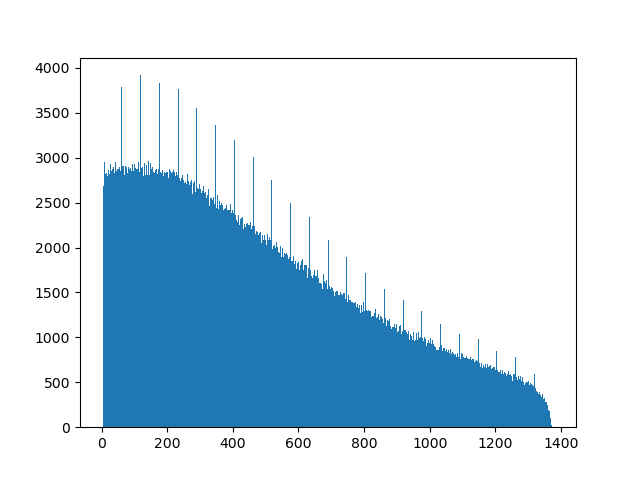

In [29]:
%matplotlib notebook
arrivalTimes = []
for i in dfPulsesFiltered["arrivalTimes"]:
    arrivalTimes.extend(i)

nBinsFit = int(2*(len(arrivalTimes)**(2/5.0)))
# nBinsFit = 50

histData = plt.hist(arrivalTimes, bins = nBinsFit)
plt.show()

In [30]:
nBinsFit

450

# Model fitting
## Finding parameters of exponential distribution for relative times from first peak

In [31]:
import numpy as np
from scipy.optimize import curve_fit

def expDist(x, A, lamb):
    x = np.array(x)
    return A*np.exp((-1)*lamb*x)

In [32]:
histX = np.array(histData[1][:-1])
histY = np.array(histData[0])

In [33]:
fittingBoundsAmp = (1000, 100000)
fittingBoundsLam = (1e-6, 1.00)

In [34]:
#Using least-squares method
popt, pcov = curve_fit(expDist, histX, histY, bounds = ((fittingBoundsAmp[0], fittingBoundsLam[0]),(fittingBoundsAmp[1], fittingBoundsLam[1])))

distAmp, distLambda = popt

In [35]:
distAmp

3519.7252191067087

In [36]:
distLambda

0.0012115557839872196

<IPython.core.display.Javascript object>


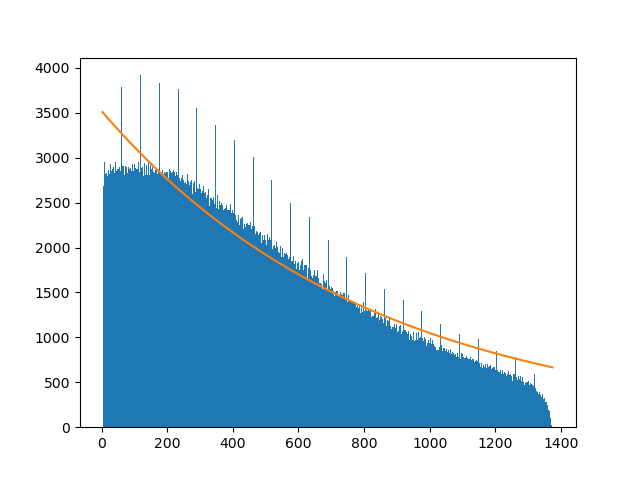

In [37]:
%matplotlib notebook

fitX = histX
fitY = expDist(fitX, distAmp, distLambda)

plt.hist(arrivalTimes, bins = nBinsFit)
plt.plot(fitX, fitY)
plt.show()

In [35]:
len(arrivalTimes)

955110

In [36]:
a = 0
for i in arrivalTimes:
    if (i < 219 and i > 216):
        a += 1

In [37]:
a

2579

## Finding parameters of exponential distribution for time between succesive peaks (Poisson)

<IPython.core.display.Javascript object>


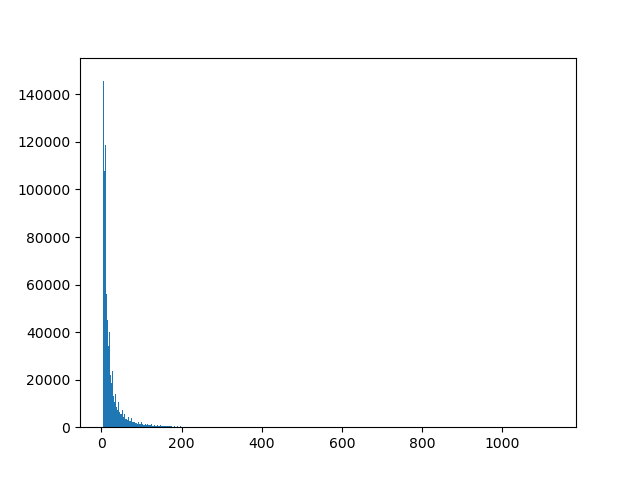

In [38]:
%matplotlib notebook
betweenPulsesTimes = []
for i in dfPulsesFiltered["timeBetweenPeaks"]:
    betweenPulsesTimes.extend(i)

nBinsFit = int(2*(len(betweenPulsesTimes)**(2/5.0)))
    
histData = plt.hist(betweenPulsesTimes, bins = nBinsFit)
plt.show()

In [124]:
import numpy as np
from scipy.optimize import curve_fit

def expDistOffSet(x, A, lamb, offset):
    x = np.array(x)
    return A*np.exp((-1)*lamb*(x-offset))

In [125]:
histX = np.array(histData[1][:-1])
histY = np.array(histData[0])

In [126]:
fittingBoundsAmp = (10000, 500000)
fittingBoundsLam = (1e-6, 1.00)
fittingBoundsOff = (-100, +100)

In [127]:
#Using least-squares method
popt, pcov = curve_fit(expDistOffSet, histX, histY, bounds = ((fittingBoundsAmp[0], fittingBoundsLam[0], fittingBoundsOff[0]),(fittingBoundsAmp[1], fittingBoundsLam[1], fittingBoundsOff[1])))

distAmp, distLambda, distOff = popt

In [128]:
distAmp

251390.80810058207

In [129]:
distLambda

0.09211613587179024

In [130]:
distOff

-1.72845062043763

<IPython.core.display.Javascript object>


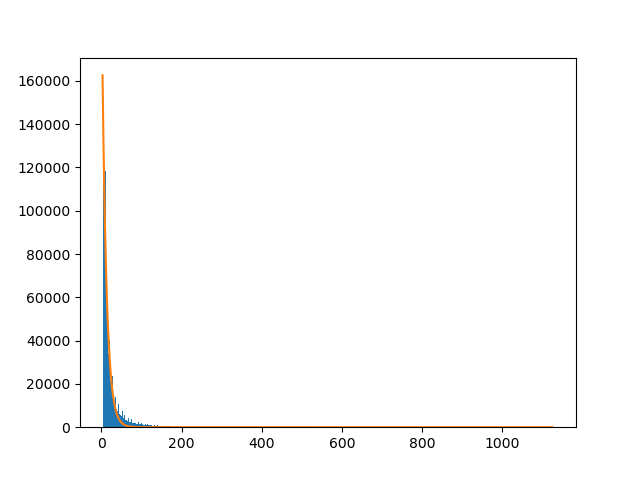

In [131]:
%matplotlib notebook

fitX = histX
fitY = expDistOffSet(fitX, distAmp, distLambda, distOff)

plt.hist(betweenPulsesTimes, bins = nBinsFit)
plt.plot(fitX, fitY)
plt.show()

<IPython.core.display.Javascript object>


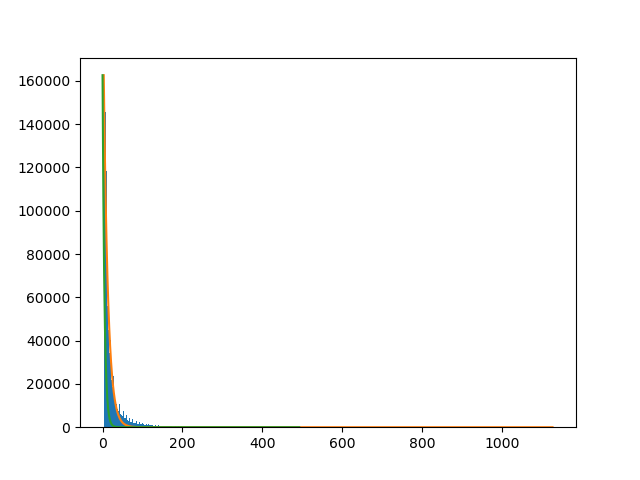

In [133]:
%matplotlib notebook

fitX = histX
fitY = expDistOffSet(fitX, distAmp, distLambda, distOff)
fitYNoOffset = expDistOffSet(fitX, distAmp, distLambda, -1.72845062043763)


plt.hist(betweenPulsesTimes, bins = nBinsFit)
plt.plot(fitX, fitY, fitYNoOffset)
plt.show()